In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [2]:
dataset=pd.read_csv('CICIDS2017_sample.csv')
dataset

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,External IP
0,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
1,214611,2269,1053,2750,88,6,12241,740,8,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
2,155937,2261,35497,2750,88,6,12265,1100,10,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
3,51222,3771,80,2743,49488,6,12299,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
4,51222,3771,80,2743,49488,6,12299,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240389,59577,699,54274,2197,443,6,92,367097,6,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
240390,54669,153,80,859,61337,6,92,66,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
240391,668,384,80,859,61331,6,92,69,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
240392,58649,698,37758,867,22,6,92,1259121,41,44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0


In [3]:
dataset. Label.value_counts()

BENIGN                        117964
DoS Hulk                       46215
PortScan                       31786
DoS GoldenEye                   9264
DDoS                            8367
FTP-Patator                     7144
SSH-Patator                     5307
DoS slowloris                   5216
DoS Slowhttptest                4949
Bot                             1966
Web Attack - Brute Force        1507
Web Attack - XSS                 652
Infiltration                      36
Web Attack - Sql Injection        21
Name: Label, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240394 entries, 0 to 240393
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      240394 non-null  int64  
 1   Source IP                    240394 non-null  int64  
 2   Source Port                  240394 non-null  int64  
 3   Destination IP               240394 non-null  int64  
 4   Destination Port             240394 non-null  int64  
 5   Protocol                     240394 non-null  int64  
 6   Timestamp                    240394 non-null  int64  
 7   Flow Duration                240394 non-null  int64  
 8   Total Fwd Packets            240394 non-null  int64  
 9   Total Backward Packets       240394 non-null  int64  
 10  Total Length of Fwd Packets  240394 non-null  float64
 11  Total Length of Bwd Packets  240394 non-null  float64
 12  Fwd Packet Length Max        240394 non-null  float64
 13 

In [5]:
new_dataset=dataset.drop(['Flow ID','Source IP','Source Port','Destination IP','Protocol','Timestamp','External IP'], axis=1)
new_dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,1,2,0,12.0,0.0,6.0,6.0,6.00000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,740,8,6,4948.0,270.0,2465.0,0.0,618.50000,937.901914,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1100,10,6,3150.0,3152.0,1575.0,0.0,315.00000,632.561635,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,49488,4,2,0,12.0,0.0,6.0,6.0,6.00000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,49488,1,2,0,12.0,0.0,6.0,6.0,6.00000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240389,443,367097,6,6,786.0,469.0,507.0,0.0,131.00000,201.698785,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
240390,61337,66,1,1,6.0,6.0,6.0,6.0,6.00000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
240391,61331,69,1,1,6.0,6.0,6.0,6.0,6.00000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
240392,22,1259121,41,44,2664.0,6954.0,456.0,0.0,64.97561,109.864573,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [6]:
new_dataset. Label.value_counts()

BENIGN                        117964
DoS Hulk                       46215
PortScan                       31786
DoS GoldenEye                   9264
DDoS                            8367
FTP-Patator                     7144
SSH-Patator                     5307
DoS slowloris                   5216
DoS Slowhttptest                4949
Bot                             1966
Web Attack - Brute Force        1507
Web Attack - XSS                 652
Infiltration                      36
Web Attack - Sql Injection        21
Name: Label, dtype: int64

In [7]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240394 entries, 0 to 240393
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             240394 non-null  int64  
 1   Flow Duration                240394 non-null  int64  
 2   Total Fwd Packets            240394 non-null  int64  
 3   Total Backward Packets       240394 non-null  int64  
 4   Total Length of Fwd Packets  240394 non-null  float64
 5   Total Length of Bwd Packets  240394 non-null  float64
 6   Fwd Packet Length Max        240394 non-null  float64
 7   Fwd Packet Length Min        240394 non-null  float64
 8   Fwd Packet Length Mean       240394 non-null  float64
 9   Fwd Packet Length Std        240394 non-null  float64
 10  Bwd Packet Length Max        240394 non-null  float64
 11  Bwd Packet Length Min        240394 non-null  float64
 12  Bwd Packet Length Mean       240394 non-null  float64
 13 

In [8]:
new_dataset.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,1,2,0,12.0,0.0,6.0,6.0,6.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,740,8,6,4948.0,270.0,2465.0,0.0,618.5,937.901914,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1100,10,6,3150.0,3152.0,1575.0,0.0,315.0,632.561635,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,49488,4,2,0,12.0,0.0,6.0,6.0,6.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,49488,1,2,0,12.0,0.0,6.0,6.0,6.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [9]:
new_dataset.describe(include=[int, float])

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,240394.000000,2.403940e+05,240394.000000,240394.000000,2.403940e+05,2.403940e+05,240394.000000,240394.000000,240394.000000,240394.000000,...,240394.000000,2.403940e+05,2.403940e+05,2.403940e+05,2.403940e+05,2.403940e+05,2.403940e+05,2.403940e+05,2.403940e+05,2.403940e+05
mean,5759.446683,2.112704e+07,6.472033,6.256500,5.144000e+02,8.252328e+03,184.343033,13.634042,49.599780,63.777561,...,3.424299,-3.252505e+03,1.683908e+05,6.291903e+04,2.387736e+05,1.268239e+05,1.532006e+07,8.939623e+05,1.613957e+07,1.464237e+07
std,15236.315594,3.802540e+07,336.767349,387.405637,1.107417e+04,1.290322e+06,600.182766,74.956404,164.539010,224.870039,...,330.457208,1.134372e+06,9.720030e+05,5.594994e+05,1.295987e+06,8.862522e+05,3.247858e+07,5.941368e+06,3.332299e+07,3.230482e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,7.500000e+01,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,4.838300e+04,2.000000,2.000000,5.300000e+01,9.600000e+01,31.000000,0.000000,27.000000,0.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,1.160271e+07,6.000000,5.000000,3.360000e+02,3.525000e+03,304.000000,6.000000,51.000000,105.737411,...,2.000000,3.200000e+01,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,6.434350e+06,0.000000e+00,6.442312e+06,5.776121e+06
max,65523.000000,1.199999e+08,161754.000000,183913.000000,2.866110e+06,6.270000e+08,24820.000000,1983.000000,5940.857143,7049.469004,...,159059.000000,9.300000e+01,1.100000e+08,6.390000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [10]:
new_dataset.describe(include=[object]).transpose()

,count,unique,top,freq
Label,240394,14,BENIGN,117964


In [11]:
new_dataset.Label.value_counts()

BENIGN                        117964
DoS Hulk                       46215
PortScan                       31786
DoS GoldenEye                   9264
DDoS                            8367
FTP-Patator                     7144
SSH-Patator                     5307
DoS slowloris                   5216
DoS Slowhttptest                4949
Bot                             1966
Web Attack - Brute Force        1507
Web Attack - XSS                 652
Infiltration                      36
Web Attack - Sql Injection        21
Name: Label, dtype: int64

In [12]:
new_dataset.duplicated().any()

True

In [13]:
print('Data size BEFORE deleteting instances with duplicate values: ', new_dataset.shape[0], end='\n\n')

# Remove duplicate rows
new_dataset.drop_duplicates(inplace=True, keep=False, ignore_index=True)

print('Data size AFTER deleteting instances containing duplicate values: ', new_dataset.shape[0])

Data size BEFORE deleteting instances with duplicate values:  240394

Data size AFTER deleteting instances containing duplicate values:  211235


# Dealing with missing values

In [14]:
new_dataset.isnull().sum().sum()

0

# Dealing with infinite values

In [15]:
np.all(np.isfinite(new_dataset.drop(['Label'], axis=1)))

True

In [16]:
new_dataset.Label.value_counts()

BENIGN                        114509
DoS Hulk                       34680
PortScan                       23114
DoS GoldenEye                   9252
DDoS                            8367
FTP-Patator                     4990
DoS slowloris                   4764
DoS Slowhttptest                4669
SSH-Patator                     2789
Bot                             1947
Web Attack - Brute Force        1445
Web Attack - XSS                 652
Infiltration                      36
Web Attack - Sql Injection        21
Name: Label, dtype: int64

In [17]:
new_dataset.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets    float64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Label                           object
Length: 78, dtype: object

In [18]:
dataset_std = new_dataset.std(numeric_only=True)
dataset_std

Destination Port               1.588131e+04
Flow Duration                  3.969036e+07
Total Fwd Packets              3.592548e+02
Total Backward Packets         4.132742e+02
Total Length of Fwd Packets    1.181203e+04
                                   ...     
Active Min                     9.441079e+05
Idle Mean                      3.410882e+07
Idle Std                       6.328282e+06
Idle Max                       3.496573e+07
Idle Min                       3.396740e+07
Length: 77, dtype: float64

In [19]:
# Find Features that meet the threshold
constant_features = [column for column, std in dataset_std.iteritems() if std < 0.01]

# Drop the constant features
new_dataset.drop(labels=constant_features, axis=1, inplace=True)

Some features such as bwd_psh_flags, fwd_urg_flags, bwd_urg_flags, cwe_flag_count, fwd_avg_bytes_bulk, fwd_avg_packets_bulk, fwd_avg_bulk_rate, bwd_avg_bytes_bulk, bwd_avg_packets_bulk, bwd_avg_bulk_rate don't vary. Hence, the correlation is NaN by definition.

# Observing the outliers

In [20]:
Q1 = new_dataset.quantile(0.25)
Q3 = new_dataset.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers with interquartile range
filt = (new_dataset < (Q1 - 1.5 * IQR)) | (new_dataset > (Q3 + 1.5 * IQR))
print(filt.sum())

ACK Flag Count                     0
Active Max                     37160
Active Mean                    37161
Active Min                     38889
Active Std                     12008
                               ...  
Total Length of Bwd Packets     4210
Total Length of Fwd Packets    20735
URG Flag Count                 14538
act_data_pkt_fwd               25283
min_seg_size_forward             121
Length: 68, dtype: int64


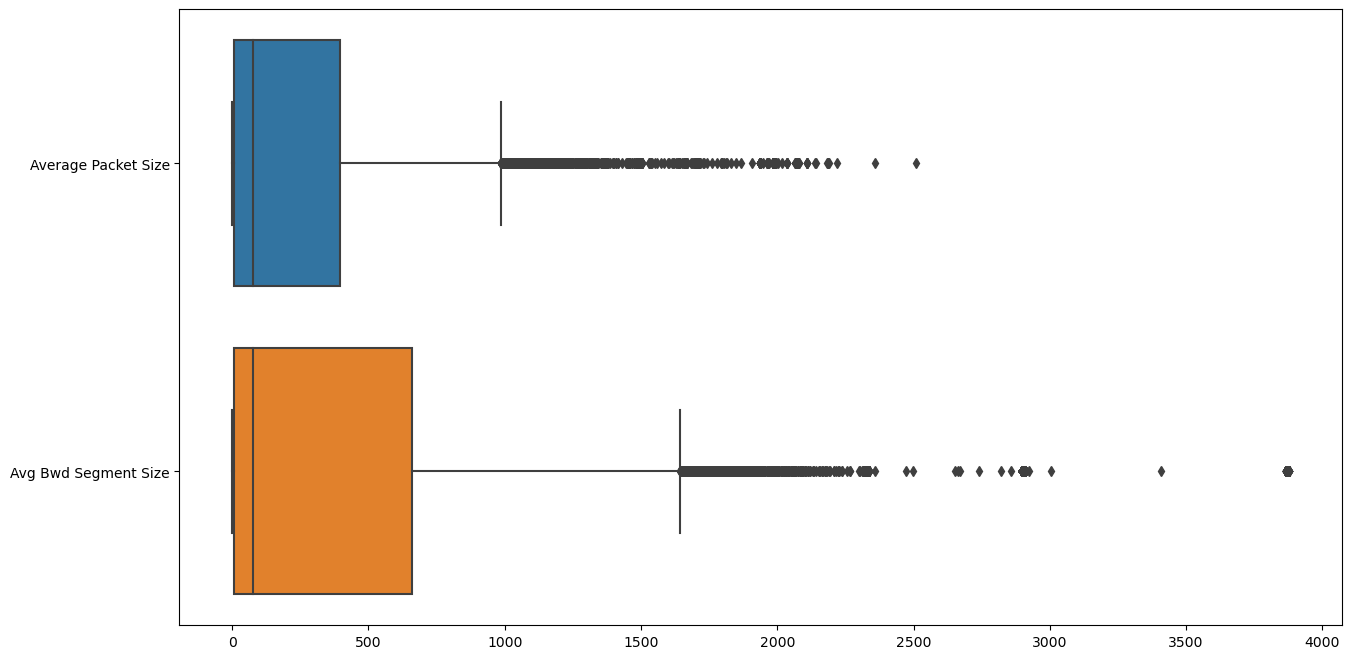

In [21]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=new_dataset[["Average Packet Size", "Avg Bwd Segment Size"]], orient="h")

#plt.title('Summary of some variables containing outliers', fontsize=18)
plt.show()

In [22]:
new_dataset[['Flow Bytes/s', 'Flow Packets/s']] = dataset[['Flow Bytes/s', 'Flow Packets/s']].apply(pd.to_numeric)

In [23]:
conds = [
    (new_dataset['Destination Port'] >= 1) & (new_dataset['Destination Port'] < 1024),
    (new_dataset['Destination Port'] >= 1024) & (new_dataset['Destination Port'] < 49152),
    (new_dataset['Destination Port'] >= 49152) & (new_dataset['Destination Port'] <= 65535)
]

choices = [
    "1 - 1023", 
    "1024 - 49151",
    "49152 - 65535"
]

new_dataset.insert(1, 'Destination Port Category', np.select(conds, choices, default="0"))

# Data Exploration

In [24]:
dataset_corr = new_dataset.corr()
dataset_corr.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.205548,-0.005491,-0.005248,0.003986,-0.002557,0.069792,-0.016843,0.114221,0.097548,...,-0.003506,0.000373,-0.060285,-0.044876,-0.066705,-0.047304,-0.173199,-0.032482,-0.175427,-0.169077
Flow Duration,-0.205548,1.000000,0.015168,0.013708,0.042938,0.006996,0.218193,-0.128626,0.113944,0.216064,...,0.009155,-0.000136,0.216914,0.225989,0.274756,0.143118,0.860280,0.279218,0.885498,0.824689
Total Fwd Packets,-0.005491,0.015168,1.000000,0.998066,0.241500,0.996148,0.010061,-0.003531,0.003334,0.004404,...,0.998169,-0.000360,0.010358,0.010332,0.014013,0.007046,0.002157,0.001883,0.002472,0.001857
Total Backward Packets,-0.005248,0.013708,0.998066,1.000000,0.234709,0.991984,0.011089,-0.003043,0.002938,0.004332,...,0.996102,0.000039,0.007158,0.006530,0.009960,0.005501,0.001323,0.000206,0.001263,0.001260
Total Length of Fwd Packets,0.003986,0.042938,0.241500,0.234709,1.000000,0.181603,0.200973,-0.003556,0.190669,0.152331,...,0.241618,-0.000621,0.056943,0.073571,0.080710,0.030882,0.004368,0.013232,0.006842,0.002460


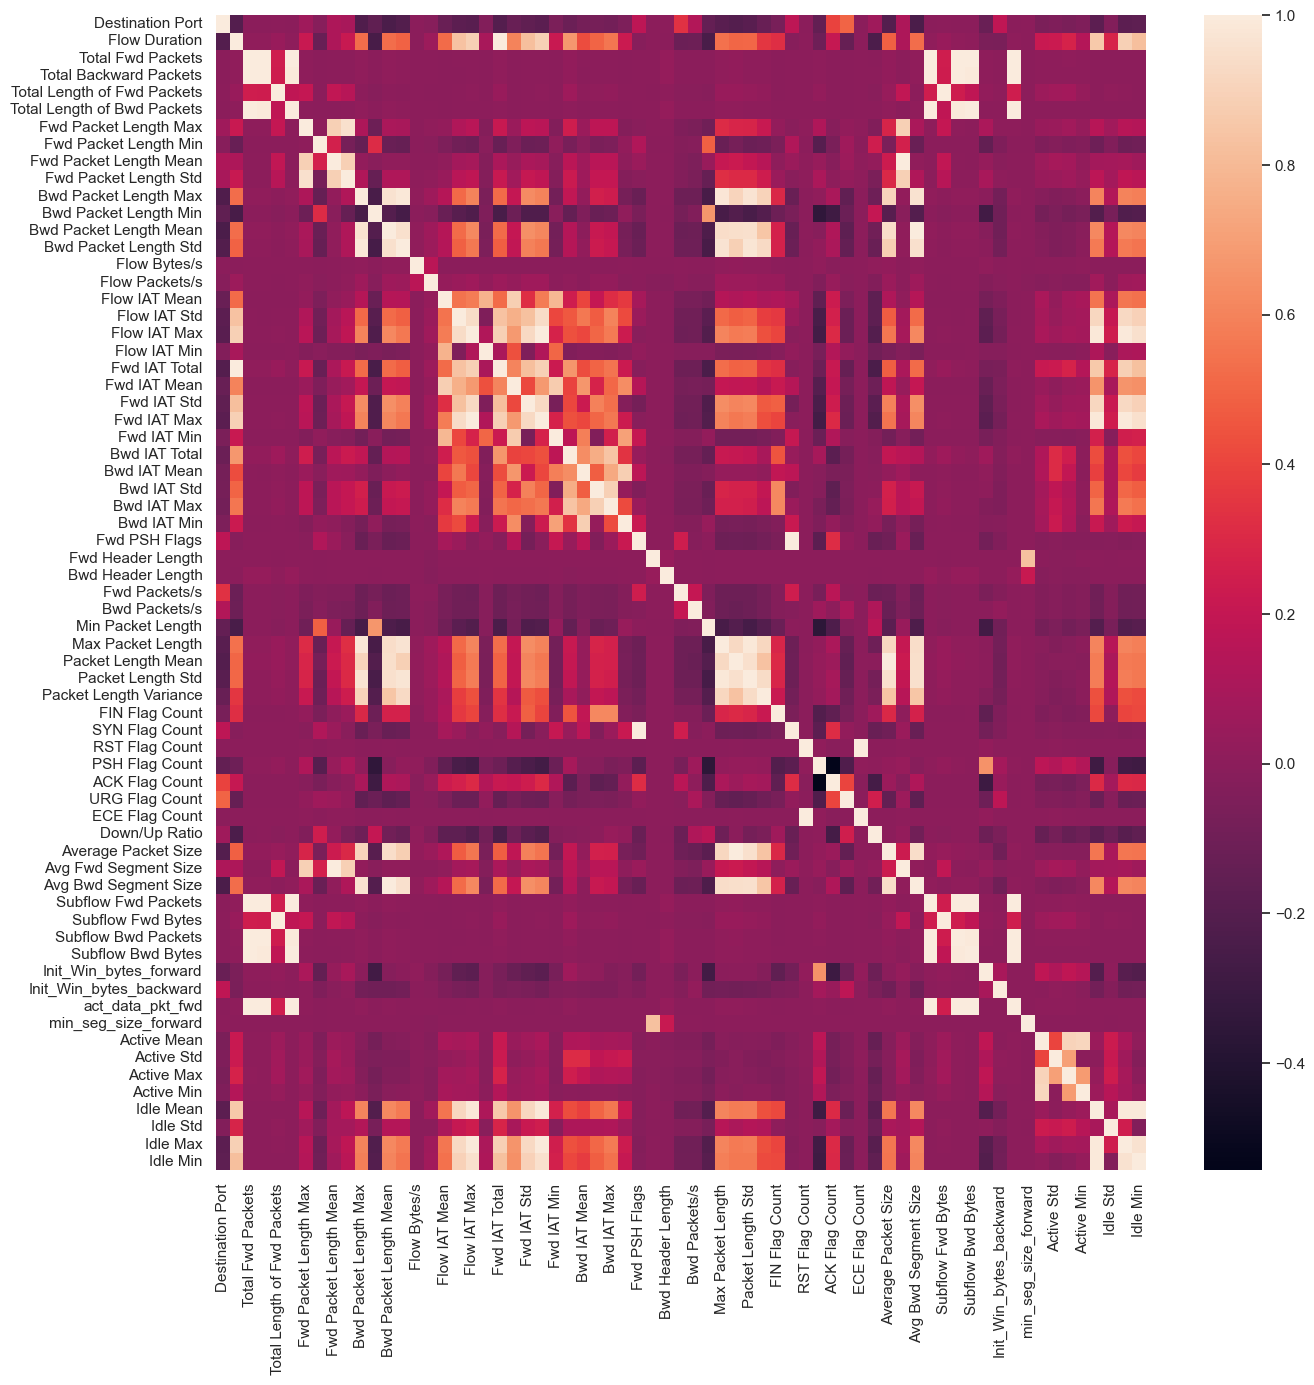

In [25]:
fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
ax = sns.heatmap(dataset_corr, annot=False)

In [26]:
# Create & Apply mask
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
tri_df = dataset_corr.mask(mask)

# Find Features that meet the threshold
correlated_features = [c for c in tri_df.columns if any(tri_df[c] > 0.98)]

# Drop the highly correlated features
new_dataset.drop(labels=correlated_features, axis=1, inplace=True)

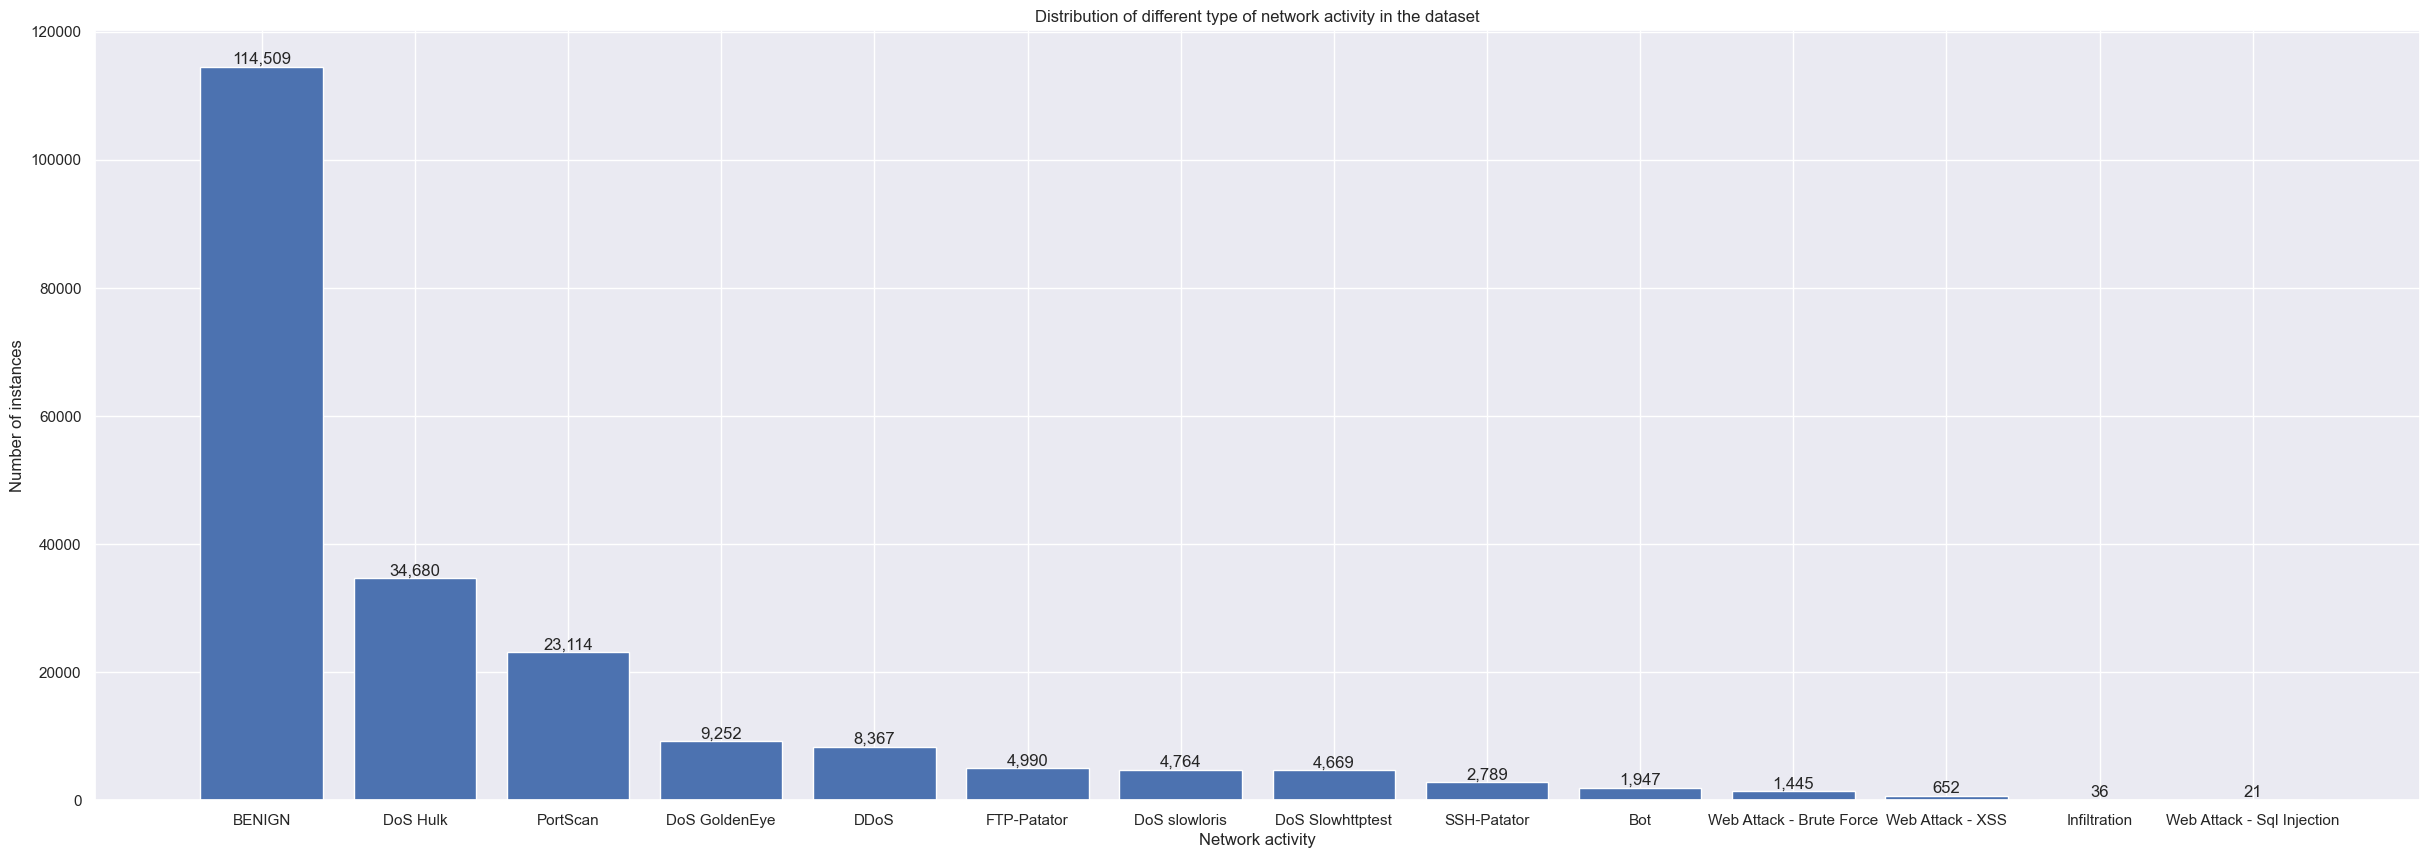

In [27]:
fig = plt.figure(figsize=(30, 10))

attack = new_dataset['Label'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom')

plt.title('Distribution of different type of network activity in the dataset')
plt.xlabel('Network activity')
plt.ylabel('Number of instances')
plt.grid(True)
plt.show()

In [28]:
new_dataset['Label'] = new_dataset['Label'].str.replace('Web Attack �', 'Web Attack', regex=False)

# Proposed Groupings
attack_group = {
    'BENIGN': 'Benign',
    'PortScan': 'PortScan',
    'DDoS': 'DoS/DDoS',
    'DoS Hulk': 'DoS/DDoS',
    'DoS GoldenEye': 'DoS/DDoS',
    'DoS slowloris': 'DoS/DDoS', 
    'DoS Slowhttptest': 'DoS/DDoS',
    'Heartbleed': 'DoS/DDoS',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Botnet ARES',
    'Web Attack - Brute Force': 'Web Attack',
    'Web Attack - Sql Injection': 'Web Attack',
    'Web Attack - XSS': 'Web Attack',
    'Infiltration': 'Infiltration'
}

# Create grouped label column
new_dataset['label_category'] = new_dataset['Label'].map(lambda x: attack_group[x])
new_dataset['label_category'].value_counts()

Benign          114509
DoS/DDoS         61732
PortScan         23114
Brute Force       7779
Web Attack        2118
Botnet ARES       1947
Infiltration        36
Name: label_category, dtype: int64

In [29]:
def attack_encode(value):
    if value == 'Benign':
        return 0;
    elif value == "Dos/DDoS":
        return 1;
    elif value == 'PortScan':
        return 2;
    elif value == 'Brute Force':
        return 3;
    elif value == "Web Attack":
        return 4;
    elif value == 'Botnet ARES':
        return 5;
    else:
        return 6;

In [30]:
new_dataset['intrusion_code'] = new_dataset['label_category'].apply(attack_encode)
new_dataset.iloc[:10, -5:]

,Idle Max,Idle Min,Label,label_category,intrusion_code
0,0.0,0.0,BENIGN,Benign,0
1,0.0,0.0,BENIGN,Benign,0
2,0.0,0.0,BENIGN,Benign,0
3,0.0,0.0,BENIGN,Benign,0
4,22231954.0,8502074.0,BENIGN,Benign,0
5,55919006.0,55919006.0,BENIGN,Benign,0
6,61911381.0,12911359.0,BENIGN,Benign,0
7,63888414.0,32888043.0,BENIGN,Benign,0
8,0.0,0.0,BENIGN,Benign,0
9,0.0,0.0,BENIGN,Benign,0


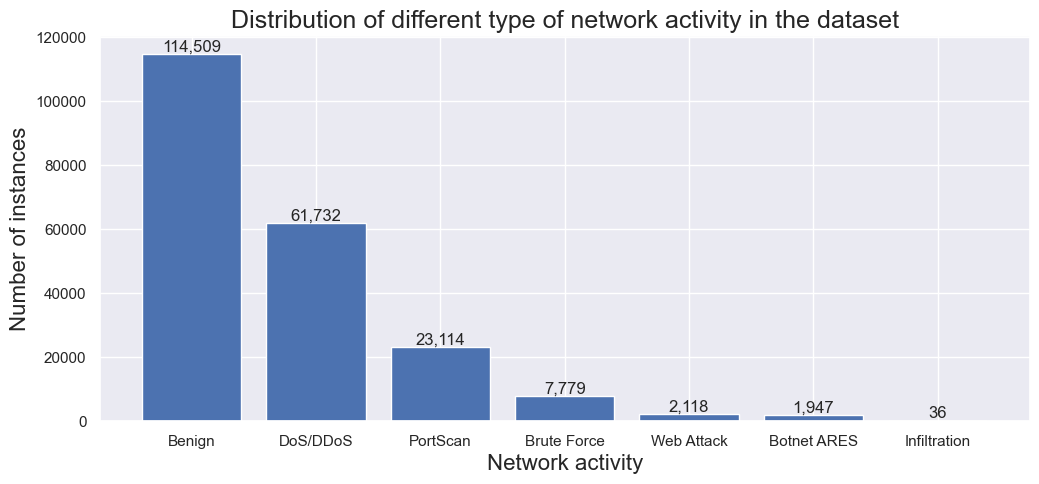

In [31]:
fig = plt.figure(figsize=(12, 5))

attack = new_dataset['label_category'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of different type of network activity in the dataset', fontsize=18)
plt.xlabel('Network activity', fontsize=16)
plt.ylabel('Number of instances', fontsize=16)
plt.grid(True)
plt.show()

# Data Preparation

In [32]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211235 entries, 0 to 211234
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Destination Port           211235 non-null  int64  
 1   Destination Port Category  211235 non-null  object 
 2   Fwd Packet Length Max      211235 non-null  float64
 3   Fwd Packet Length Min      211235 non-null  float64
 4   Fwd Packet Length Std      211235 non-null  float64
 5   Bwd Packet Length Min      211235 non-null  float64
 6   Bwd Packet Length Std      211235 non-null  float64
 7   Flow Bytes/s               211235 non-null  int64  
 8   Flow Packets/s             211235 non-null  int64  
 9   Flow IAT Mean              211235 non-null  float64
 10  Flow IAT Std               211235 non-null  float64
 11  Flow IAT Min               211235 non-null  float64
 12  Fwd IAT Total              211235 non-null  float64
 13  Fwd IAT Mean               21

In [33]:
labels = new_dataset['label_category']
features = new_dataset.drop(labels=['Label', 'label_category', 'Destination Port Category'], axis=1)

In [34]:
new_dataset.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code             1.000000
Idle Max                   0.612658
Fwd IAT Std                0.593026
Avg Bwd Segment Size       0.585032
Bwd Packet Length Std      0.579303
Idle Min                   0.577149
Packet Length Std          0.566423
Flow IAT Std               0.558319
Average Packet Size        0.530034
Fwd IAT Total              0.506704
Packet Length Variance     0.478788
Fwd IAT Mean               0.372093
Flow IAT Mean              0.367873
FIN Flag Count             0.320046
Bwd IAT Std                0.301487
Bwd IAT Max                0.287521
ACK Flag Count             0.182164
Bwd IAT Mean               0.176598
Active Mean                0.170403
Idle Std                   0.167746
Bwd IAT Total              0.153328
Active Min                 0.147360
Active Max                 0.133949
Flow IAT Min               0.112292
Fwd IAT Min                0.105826
Active Std                 0.077730
Init_Win_bytes_forward     0.063352
Bwd IAT Min                0

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


In [36]:
X_train.shape, X_test.shape

((168988, 50), (42247, 50))

# Scaling features to a range

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer

In [38]:
categorical_features = features.select_dtypes(exclude=["int64", "float64"]).columns
numeric_features = features.select_dtypes(exclude=[object]).columns

preprocessor = ColumnTransformer(transformers=[
    ('categoricals', OneHotEncoder(drop='first', sparse=False, handle_unknown='error'), categorical_features),
    ('numericals', QuantileTransformer(), numeric_features)
])

In [39]:
columns = numeric_features.tolist()

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=columns)


In [40]:
le = LabelEncoder()

y_train = pd.DataFrame(le.fit_transform(y_train), columns=["Label"])
y_test = pd.DataFrame(le.transform(y_test), columns=["Label"])


In [41]:
X_train.shape, X_test.shape

((168988, 50), (42247, 50))

In [42]:
y_train.shape, y_test.shape

((168988, 1), (42247, 1))

# 3 satge calssifier

In [43]:
import xgboost as xgb
dt_clf=DecisionTreeClassifier(random_state=40)
rnd_clf=RandomForestClassifier(random_state=40)
xg_clf=xgb.XGBClassifier(random_state=40)

In [44]:
from sklearn.ensemble import VotingClassifier # Voting Classifier model classification
voting_clf=VotingClassifier(estimators=[('dt',dt_clf),('rn',rnd_clf),('xg',xg_clf)])

In [45]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=40)),
                             ('rn', RandomForestClassifier(random_state=40)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            intera

In [46]:
from sklearn.metrics import accuracy_score
for clf in(dt_clf,rnd_clf,xg_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))

DecisionTreeClassifier 1.0
RandomForestClassifier 1.0
XGBClassifier 1.0
VotingClassifier 1.0


Precision of Voting Classifier: 1.0
Recall of Voting Classifier: 1.0
F1-score of Voting Classifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91607
           1       1.00      1.00      1.00      1558
           2       1.00      1.00      1.00      6223
           3       1.00      1.00      1.00     49386
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00     18491
           6       1.00      1.00      1.00      1694

    accuracy                           1.00    168988
   macro avg       1.00      1.00      1.00    168988
weighted avg       1.00      1.00      1.00    168988



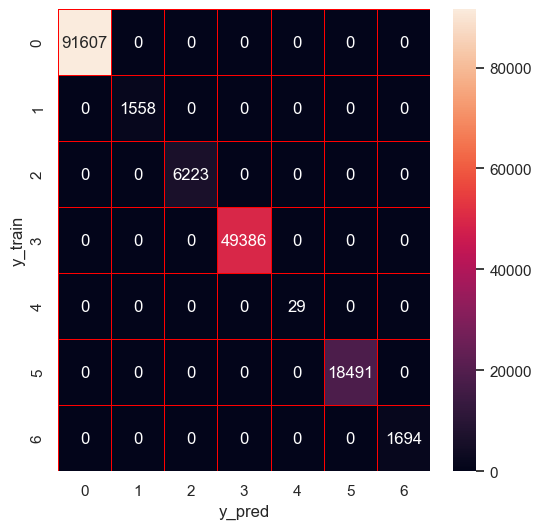

In [47]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,none= precision_recall_fscore_support(y_train, y_pred, average='weighted') 
print('Precision of Voting Classifier: '+(str(precision)))
print('Recall of Voting Classifier: '+(str(recall)))
print('F1-score of Voting Classifier: '+(str(fscore)))
print(classification_report(y_train,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_train")
plt.show()

In [48]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [49]:
print(ACC)

[1. 1. 1. 1. 1. 1. 1.]


In [50]:
print(TPR)

[1. 1. 1. 1. 1. 1. 1.]


In [51]:
print(TNR)

[1. 1. 1. 1. 1. 1. 1.]


In [52]:
print(FPR)

[0. 0. 0. 0. 0. 0. 0.]


In [53]:
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


benign_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0]) 
Botnet_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
Bruteforce_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
DoS_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
infiltration_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
PortScan_tn = np.sum(cm) - (tp[5]+ fp[5] + fn[5])
WebAttack_tn = np.sum(cm) - (tp[6]+ fp[6] + fn[6])
print('True Negative Per Label: ' + str([benign_tn, Botnet_tn, Bruteforce_tn, DoS_tn, infiltration_tn,PortScan_tn,WebAttack_tn]))


benign_fpr = fp[0]/ (fp[0] + benign_tn)
Botnet_fpr = fp[1]/ (fp[1] + Botnet_tn)
Bruteforce_fpr = fp[2]/ (fp[2] + Bruteforce_tn)
DoS_fpr = fp[3]/ (fp[3] + DoS_tn)
infiltration_fpr = fp[4]/ (fp[4] + infiltration_tn)
PortScan_fpr = fp[3]/ (fp[3] + PortScan_tn)
WebAttack_fpr = fp[4]/ (fp[4] + WebAttack_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, Botnet_fpr, Bruteforce_fpr, DoS_fpr,infiltration_fpr,PortScan_fpr,WebAttack_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([benign_tn, Botnet_tn, Bruteforce_tn, DoS_tn, infiltration_tn,PortScan_tn,WebAttack_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [91607  1558  6223 49386    29 18491  1694]
False Positive Per Label: [0 0 0 0 0 0 0]
False Negative Per Label: [0 0 0 0 0 0 0]
True Negative Per Label: [77381, 167430, 162765, 119602, 168959, 150497, 167294]
False Positive Rate Per Label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall False Positive Rate = 0.0



In [54]:
from sklearn.metrics import accuracy_score
for clf in(dt_clf,rnd_clf,xg_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

DecisionTreeClassifier 1.0
RandomForestClassifier 0.999976329680214
XGBClassifier 1.0
VotingClassifier 1.0


Precision of Voting Classifier: 1.0
Recall of Voting Classifier: 1.0
F1-score of Voting Classifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22902
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00      1556
           3       1.00      1.00      1.00     12346
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      4623
           6       1.00      1.00      1.00       424

    accuracy                           1.00     42247
   macro avg       1.00      1.00      1.00     42247
weighted avg       1.00      1.00      1.00     42247



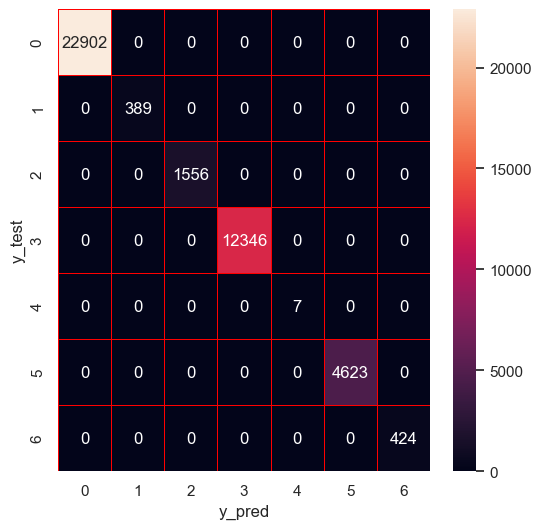

In [55]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of Voting Classifier: '+(str(precision)))
print('Recall of Voting Classifier: '+(str(recall)))
print('F1-score of Voting Classifier: '+(str(fscore)))
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [56]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [57]:
print(ACC)

[1. 1. 1. 1. 1. 1. 1.]


In [58]:
print(FPR)

[0. 0. 0. 0. 0. 0. 0.]


In [59]:
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


benign_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0]) 
Botnet_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
Bruteforce_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
DoS_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
infiltration_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
PortScan_tn = np.sum(cm) - (tp[5]+ fp[5] + fn[5])
WebAttack_tn = np.sum(cm) - (tp[6]+ fp[6] + fn[6])
print('True Negative Per Label: ' + str([benign_tn, Botnet_tn, Bruteforce_tn, DoS_tn, infiltration_tn,PortScan_tn,WebAttack_tn]))


benign_fpr = fp[0]/ (fp[0] + benign_tn)
Botnet_fpr = fp[1]/ (fp[1] + Botnet_tn)
Bruteforce_fpr = fp[2]/ (fp[2] + Bruteforce_tn)
DoS_fpr = fp[3]/ (fp[3] + DoS_tn)
infiltration_fpr = fp[4]/ (fp[4] + infiltration_tn)
PortScan_fpr = fp[5]/ (fp[5] + PortScan_tn)
WebAttack_fpr = fp[6]/ (fp[6] + WebAttack_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, Botnet_fpr, Bruteforce_fpr, DoS_fpr,infiltration_fpr,PortScan_fpr,WebAttack_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([benign_tn, Botnet_tn, Bruteforce_tn, DoS_tn, infiltration_tn,PortScan_tn,WebAttack_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [22902   389  1556 12346     7  4623   424]
False Positive Per Label: [0 0 0 0 0 0 0]
False Negative Per Label: [0 0 0 0 0 0 0]
True Negative Per Label: [19345, 41858, 40691, 29901, 42240, 37624, 41823]
False Positive Rate Per Label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall False Positive Rate = 0.0



In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_clf,features,labels)
print(scores)
print(np.mean(scores))

[0.99990532 1.         0.99997633 1.         1.        ]
0.999976329680214
